In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import pickle
from sklearn import metrics,tree
from sklearn.model_selection import cross_val_score,train_test_split,LeaveOneOut


from data_load import *
from dictionaries import *

# Test Vector for model testing

In [12]:
test_vector = [None] * 25
test_vector[0] =  2   # {'problem_type': {'defined': 0, 'investigate': 2, 'discover': 1}}
test_vector[1] =  2   #{'creative': {'somewhat_creative': 2, 'creative': 0, 'not_creative': 1}}
test_vector[2] =  1   #{'outdoors': {'limited': 1, 'indoors': 0, 'outdoors': 2}}
test_vector[3] =  4   #{'career': {'moving_parts': 2, 'sensors': 6, 'programming': 4, 'optimizing': 3, 'resources': 5, 'buildings': 0, 'molecules': 1}}
test_vector[4] =  1   #{'group_work': {'occasionally': 1, 'yes': 2, 'no': 0}}
test_vector[5] =  4   #{'liked_courses': {'computer_science': 4, 'biology': 1, 'math': 8, 'physics': 9, 'chemistry': 3, 'business': 2, 'autoshop': 0, 'geography': 5, 'visual_arts': 10, 'language_arts': 7, 'history': 6}}
test_vector[6] =  6   #{'disliked_courses': {'history': 6, 'visual_arts': 10, 'geography': 5, 'chemistry': 3, 'physics': 9, 'biology': 1, 'language_arts': 7, 'business': 2, 'math': 8, 'computer_science': 4, 'autoshop': 0}}
test_vector[7] =  3   #{'programming': {'partial': 3, 'complete': 0, 'no': 2, 'interested': 1}}
test_vector[8] =  8   #{'join_clubs': {'robotics': 7, 'nan': 6, 'environment': 4, 'student_council': 8, 'business': 2, 'hacker_club': 5, 'autoshop': 1, 'art/design': 0, 'consulting': 3}}
test_vector[9] =  0   #{'not_clubs': {'art/design': 0, 'business': 2, 'student_council': 8, 'autoshop': 1, 'hacker_club': 5, 'environment': 4, 'robotics': 7, 'nan': 6, 'consulting': 3}}
test_vector[10] = 1   #{'liked_projects': {'mars_water_treatment': 1, 'prototyping_instrument': 3, 'robot': 4, 'olympic_village': 2, 'battery': 0, 'uber_pool': 6, 'supercomputer': 5}}
test_vector[11] = 1   #{'disliked_projects': {'prototyping_instrument': 3, 'mars_water_treatment': 1, 'robot': 4, 'uber_pool': 6, 'olympic_village': 2, 'battery': 0, 'supercomputer': 5}}
test_vector[12] = 0   #{'tv_shows': {'big_bang_theory': 0, 'breaking_bad': 1, 'myth_busters': 4, 'silicon_valley': 6, 'planet_earth': 5, 'greys_anatomy': 2, 'house_hunters': 3}}
test_vector[13] = 0   #{'alternate_degree': {'cs': 2, 'applied_science': 0, 'health': 8, 'env': 5, 'poli_sci': 12, 'econ': 4, 'math': 11, 'business': 1, 'design': 3, 'visual_arts': 14, 'psych': 13, 'geo': 7, 'fin': 6, 'marketing': 10, 'lit': 9}}
test_vector[14] = 1   #{'expensive_equipment': {'yes': 2, 'maybe': 0, 'no': 1}}
test_vector[15] = 2   #{'drawing': {'partial': 2, 'bad': 0, 'good': 1}}
test_vector[16] = 1   #{'essay': {'yes': 2, 'no': 0, 'partial': 1}}
test_vector[17] = 0   #{'architecture': {0: 0, 1: 1}}
test_vector[18] = 0   #{'automotive': {1: 1, 0: 0}}
test_vector[19] = 1   #{'business': {0: 0, 1: 1}}
test_vector[20] = 0   #{'construction': {1: 1, 0: 0}}
test_vector[21] = 0   #{'health': {0: 0, 1: 1}}
test_vector[22] = 1   #{'environment': {0: 0, 1: 1}}
test_vector[23] = 1   #{'manufacturing': {1: 1, 0: 0}}
test_vector[24] = 1   #{'technology': {1: 1, 0: 0}}

test_vector = np.array(test_vector).reshape(1, -1)

# Basic Decision Tree Model With No Calibration

In [13]:
model_name = 'tree_t100_all'
directory = 'test_data_100.csv'

In [14]:
data = get_encoded_data(directory,model_name,'H')[0]

x_df = data.drop(axis=1,columns=["program"])
y_df = data["program"]

X = np.array(x_df) # convert dataframe into np array
Y = np.array(y_df) # convert dataframe into np array

ent = tree.DecisionTreeClassifier()
model = ent.fit(X, Y) 

cat = data.drop('program',axis=1)
cat = dict(zip(cat.columns,range(cat.shape[1])))

print(INV_INDEX_PROGRAM[model.predict(test_vector)[0]])

save_model(model,cat,model_name)
test_model(model_name,test_vector)

tron
Loading CAT file...
Loading model...
Results:
{'arch': 0.0, 'arch-e': 0.0, 'bmed': 0.0, 'ce': 0.0, 'chem': 0.0, 'cive': 0.0, 'elec': 0.0, 'env': 0.0, 'geo': 0.0, 'mech': 0.0, 'msci': 0.0, 'nano': 0.0, 'swe': 0.0, 'syde': 0.0, 'tron': 1.0}


### LOO Validation for Basic Decision Tree Model with no Calibration

In [15]:
loo = LeaveOneOut()
loo.get_n_splits(X)
accuracy = []
for train_index, test_index in loo.split(X):
    X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index]) # use this for training the model
    y_train, y_test = Y[train_index].ravel(), Y[test_index].ravel() # use this for testing the model
    ent = tree.DecisionTreeClassifier()
    model = ent.fit(X_train, y_train) 
    accuracy.append(ent.score(X_test, y_test))
    
    # Calculate accuracy
mean = np.array(accuracy).mean()
variance = np.array(accuracy).std() * 2

print("tree_model_basic Accuracy: %0.4f (+/- %0.4f)" % (mean, variance))

tree_model_basic Accuracy: 0.6195 (+/- 0.9710)


# Industry Only Decision Tree

In [17]:
test_vector = [None] * 8
test_vector[0] = 0   #{'architecture': {0: 0, 1: 1}}
test_vector[1] = 0   #{'automotive': {1: 1, 0: 0}}
test_vector[2] = 1   #{'business': {0: 0, 1: 1}}
test_vector[3] = 0   #{'construction': {1: 1, 0: 0}}
test_vector[4] = 0   #{'health': {0: 0, 1: 1}}
test_vector[5] = 1   #{'environment': {0: 0, 1: 1}}
test_vector[6] = 1   #{'manufacturing': {1: 1, 0: 0}}
test_vector[7] = 1   #{'technology': {1: 1, 0: 0}}

test_vector = np.array(test_vector).reshape(1, -1)

In [21]:
model_name = 'tree_t100_industry_only'
directory = 'test_data_100.csv'
column_list = ['architecture', 'automotive', 'business', 'construction',
       'health', 'environment', 'manufacturing', 'technology','program']

In [22]:
data = get_encoded_data(directory,model_name,'H')[0]
data = data[column_list]

x_df = data.drop(axis=1,columns=["program"])
y_df = data["program"]

X = np.array(x_df) # convert dataframe into np array
Y = np.array(y_df) # convert dataframe into np array

ent = tree.DecisionTreeClassifier()
model = ent.fit(X, Y) 

cat = data.drop('program',axis=1)
cat = dict(zip(cat.columns,range(cat.shape[1])))

print(INV_INDEX_PROGRAM[model.predict(test_vector)[0]])

save_model(model,cat,model_name)
test_model(model_name,test_vector)

swe
Loading CAT file...
Loading model...
Results:
{'arch': 0.0, 'arch-e': 0.0, 'bmed': 0.0116, 'ce': 0.2543, 'chem': 0.0116, 'cive': 0.0058, 'elec': 0.0751, 'env': 0.0, 'geo': 0.0, 'mech': 0.0058, 'msci': 0.0751, 'nano': 0.0751, 'swe': 0.2717, 'syde': 0.1618, 'tron': 0.052}


## Leave One Out Validation

In [23]:
loo = LeaveOneOut()
loo.get_n_splits(X)
accuracy = []
for train_index, test_index in loo.split(X):
    X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index]) # use this for training the model
    y_train, y_test = Y[train_index].ravel(), Y[test_index].ravel() # use this for testing the model
    ent = tree.DecisionTreeClassifier()
    model = ent.fit(X_train, y_train) 
    accuracy.append(ent.score(X_test, y_test))
    
    # Calculate accuracy
mean = np.array(accuracy).mean()
variance = np.array(accuracy).std() * 2

print("tree_t100_industry_only Accuracy: %0.4f (+/- %0.4f)" % (mean, variance))

tree_t100_industry_only Accuracy: 0.1248 (+/- 0.6611)


## Model Bias

model loaded...
{'mech': 46, 'bmed': 20, 'swe': 4, 'tron': 33, 'cive': 22, 'chem': 14, 'syde': 10, 'msci': 24, 'ce': 15, 'elec': 6, 'nano': 14, 'geo': 1, 'env': 18, 'arch-e': 13, 'arch': 16}


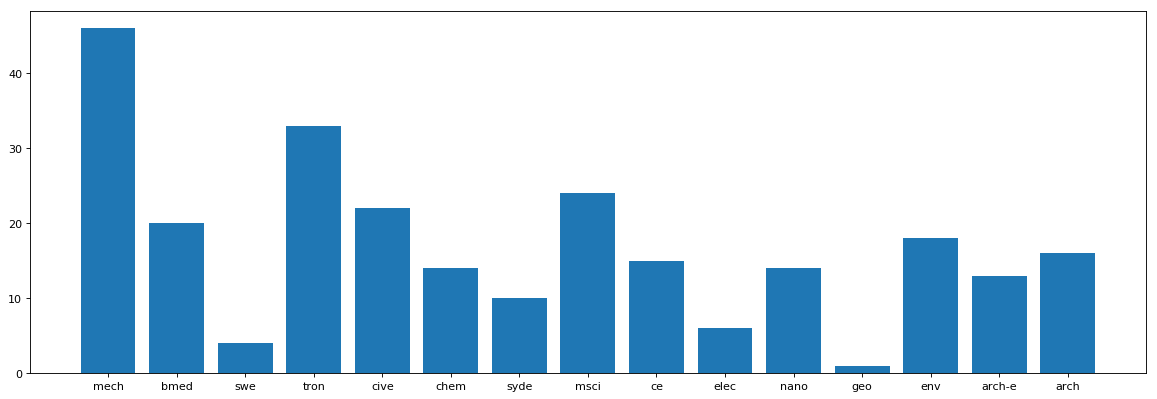

In [23]:
model_name = 'tree_industry_only'
check_count = check_skew(model_name,column_list)
print(check_count)
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(*zip(*check_count.items()))
plt.show()